In [24]:
'''This Kernel is for the analysis of different text documents. The analysis will be done using different parameters and 
    will have the following contents-
    
    1)TEXT FORMATTING
    2)ANALYSING THE MOST FREQUENT WORDS AND CREATING WORDCLOUD
    3)CREATING BAG OF WORDS
    4)FINDING OUT THE OPTIMUM No. OF CLUSTERS USING ELBOW METHOD AND SILHOUETTE COEFFICIENT
    5)TOPIC MODEL USING LDA
    6)CLUSTERING USING K-MEANS'''

'This Kernel is for the analysis of different text documents. The analysis will be done using different parameters and \n    will have the following contents-\n    \n    1)TEXT FORMATTING\n    2)ANALYSING THE MOST FREQUENT WORDS AND CREATING WORDCLOUD\n    3)CREATING BAG OF WORDS\n    4)FINDING OUT THE OPTIMUM No. OF CLUSTERS USING ELBOW METHOD AND SILHOUETTE COEFFICIENT\n    5)TOPIC MODEL USING LDA\n    6)CLUSTERING USING K-MEANS'

In [2]:
#importing different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the dataset
data=pd.read_csv('category_headlines.csv',header=None)
data.columns=['lines']

In [4]:
#having a look at the dataset
data.head()

,lines
0,Fed's Charles Plosser sees high bar for change...
1,US open: Stocks fall after Fed official hints ...
2,Fed's Plosser: Nasty Weather Has Curbed Job Gr...
3,Plosser: Fed May Have to Accelerate Tapering Pace
4,Fed's Plosser: Taper pace may be too slow


In [5]:
#importing different NLTK libraries
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re

In [6]:
          
    
'''                                                TEXT FORMATTING                                                     '''
        
        

'                                                TEXT FORMATTING                                                     '

In [7]:
 #concatenating the lines
a = data['lines'].str.lower().str.cat(sep=' ')  

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)

In [8]:
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [9]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_text = [word for word in without_single_chr if not word.isnumeric()] 

In [10]:
#Having a look at the cleaned texts
cleaned_text

['fed',
 'charles',
 'plosser',
 'sees',
 'high',
 'bar',
 'change',
 'pace',
 'tapering',
 'open',
 'stocks',
 'fall',
 'fed',
 'official',
 'hints',
 'accelerated',
 'tapering',
 'fed',
 'plosser',
 'nasty',
 'weather',
 'curbed',
 'job',
 'growth',
 'plosser',
 'fed',
 'may',
 'accelerate',
 'tapering',
 'pace',
 'fed',
 'plosser',
 'taper',
 'pace',
 'may',
 'slow',
 'fed',
 'plosser',
 'expects',
 'unemployment',
 'fall',
 'end',
 'jobs',
 'growth',
 'last',
 'month',
 'hit',
 'weather',
 'fed',
 'president',
 'charles',
 'plosser',
 'ecb',
 'unlikely',
 'end',
 'sterilisation',
 'smp',
 'purchases',
 'traders',
 'ecb',
 'unlikely',
 'end',
 'sterilization',
 'smp',
 'purchases',
 'traders',
 'half',
 'baked',
 'bank',
 'union',
 'work',
 'europe',
 'reaches',
 'crunch',
 'point',
 'banking',
 'union',
 'ecb',
 'focus',
 'stronger',
 'euro',
 'drowns',
 'ecb',
 'message',
 'keep',
 'rates',
 'low',
 'aims',
 'deal',
 'tackling',
 'failing',
 'banks',
 'forex',
 'pound',
 'drops',


In [11]:
'''Therefore we have a clean text word document list which doesnot contain any kind of numeric data,punctuation or any
kind of symbol'''

'Therefore we have a clean text word document list which doesnot contain any kind of numeric data,punctuation or any\nkind of symbol'

In [12]:


'''                          ANALYSING THE MOST FREQUENT WORDS AND CREATING WORDCLOUD                              '''



'                          ANALYSING THE MOST FREQUENT WORDS AND CREATING WORDCLOUD                              '

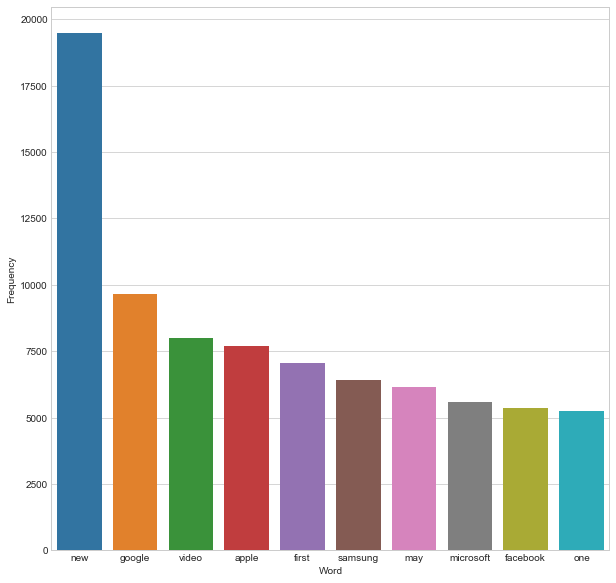

In [13]:
top_N=100

# Calculate frequency distribution of top 10 words
word_dist = nltk.FreqDist(cleaned_text)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10))

In [14]:
'''As we can see, the graph very well shows the most frequent words extracted from the cleaned_text list and 
its corresponding frequencies. The words are- 
New 
google
video
apple
first
samsung
may
microsoft
facebook
one
with New having the highest frequency'''

'As we can see, the graph very well shows the most frequent words extracted from the cleaned_text list and \nits corresponding frequencies. The words are- \nNew \ngoogle\nvideo\napple\nfirst\nsamsung\nmay\nmicrosoft\nfacebook\none\nwith New having the highest frequency'

In [15]:
#creating the WORDCLOUD function
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')


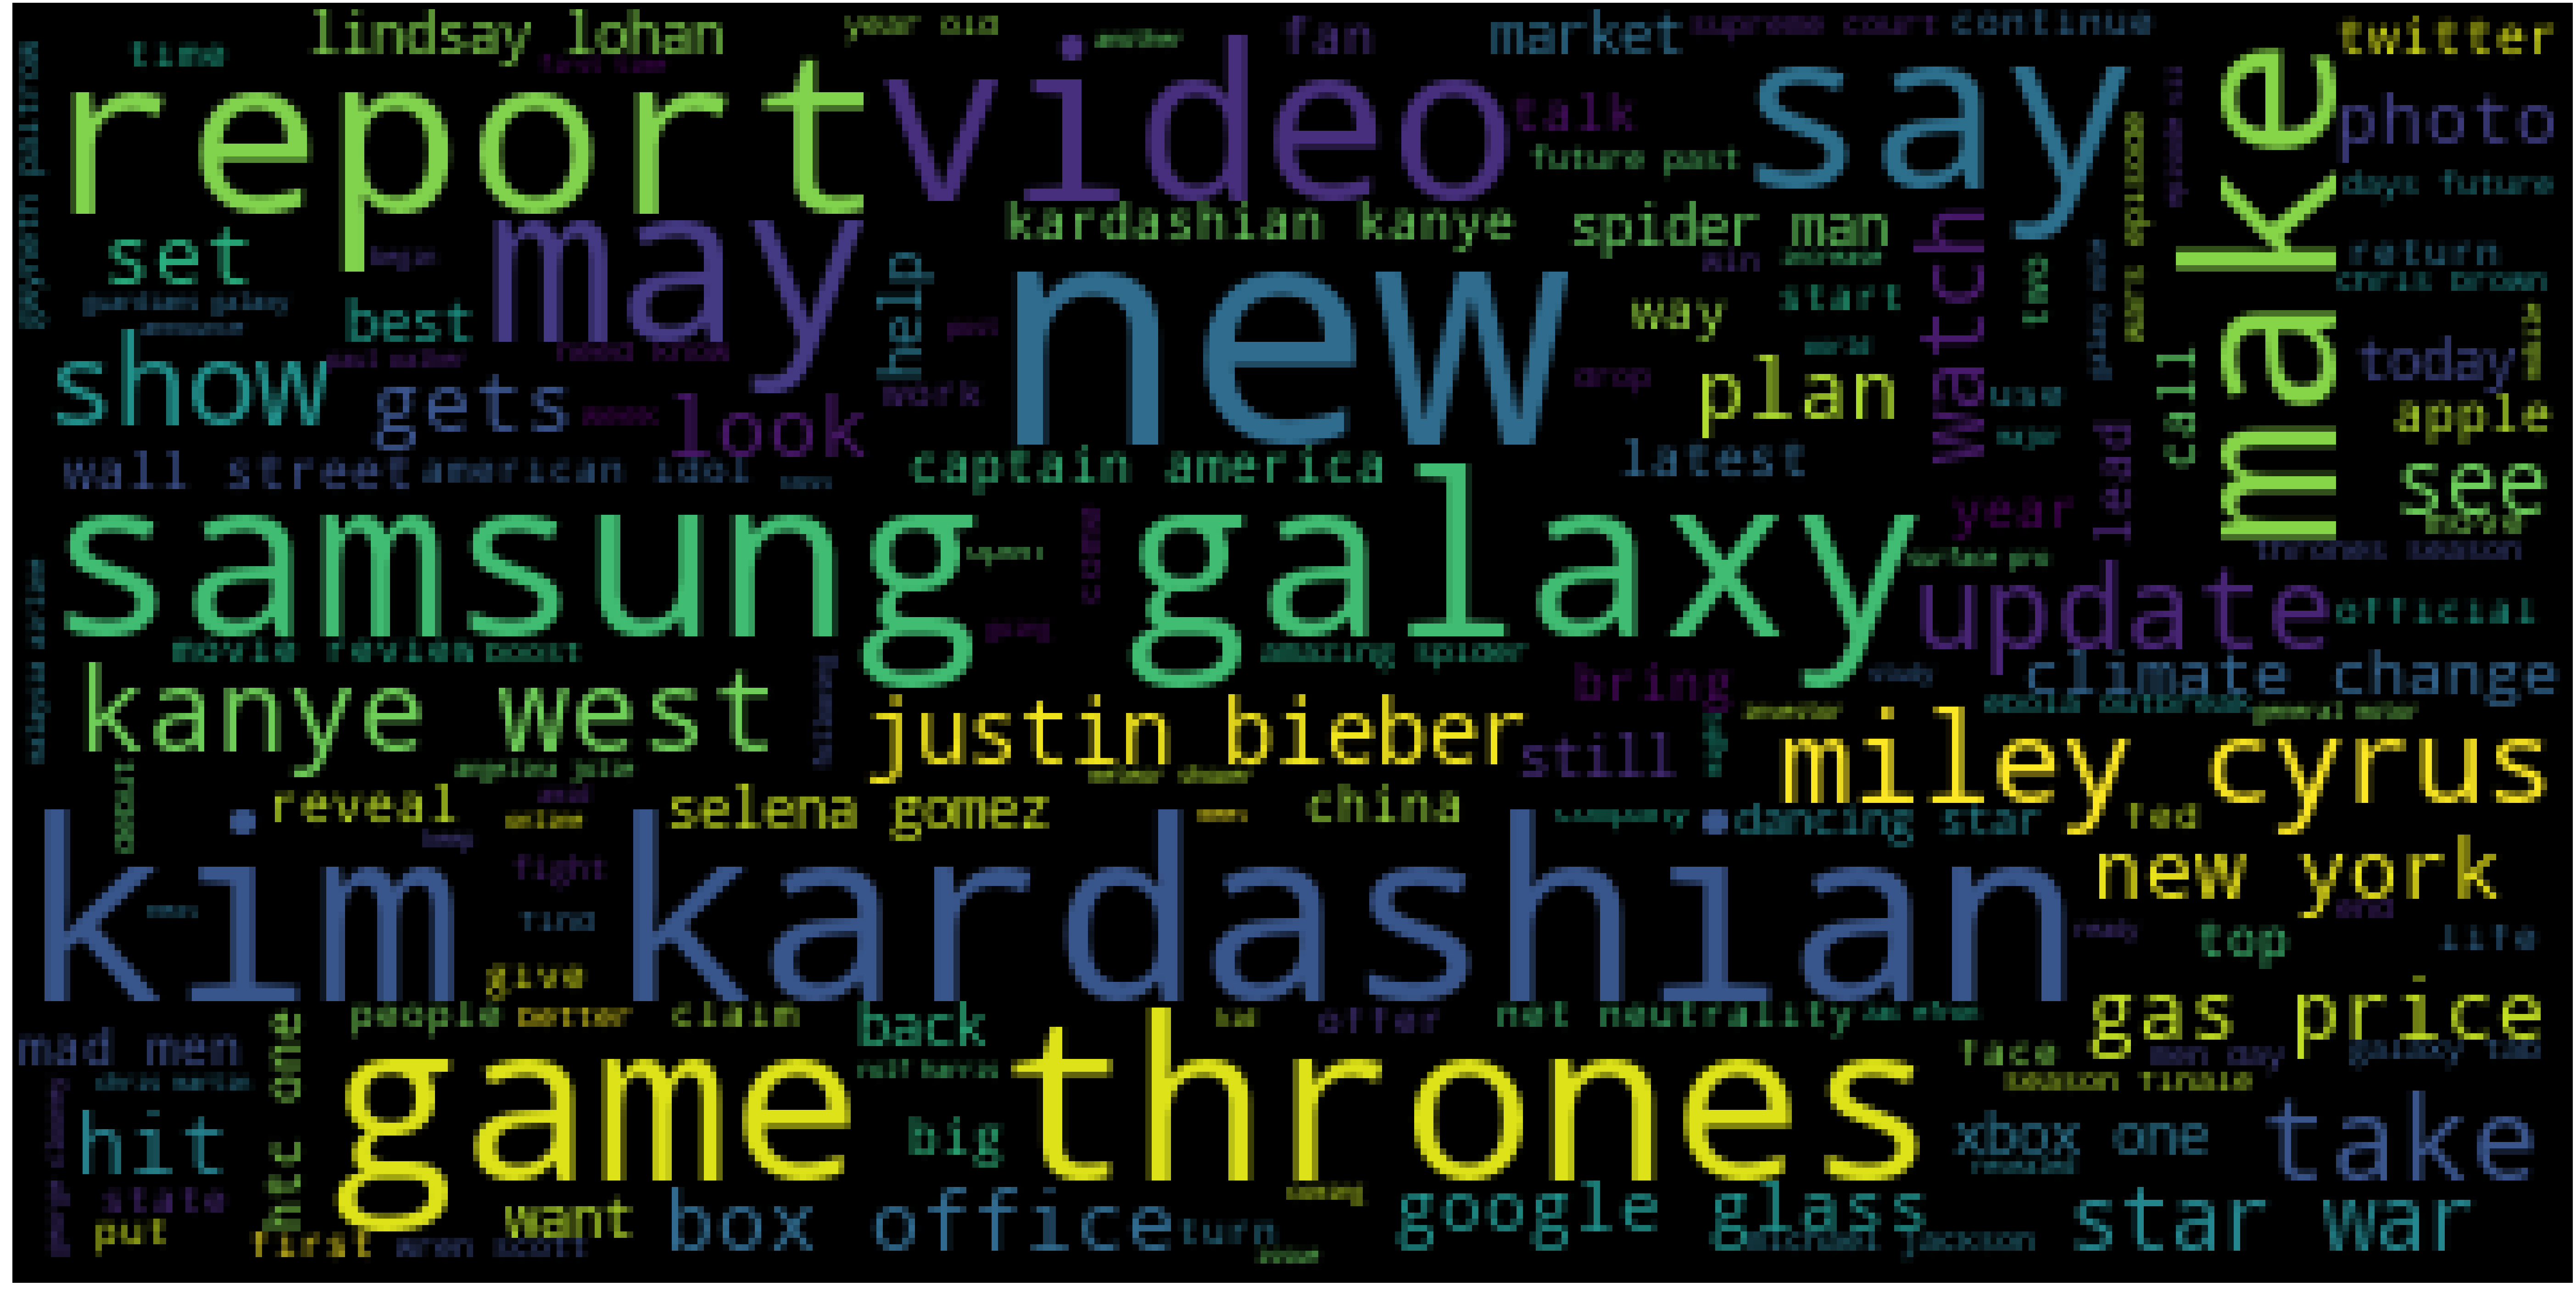

In [16]:
#having a look at the wordcloud
wc(cleaned_text,'black','Most Used Words')

In [17]:
'''By this we get the idea of what the context is about. It shows mainly about the media and the stars involved.
Words like facebook,video,show,apple,samsung galxy,google tells us about the media and different channels of it.
Words like Game of thrones,Kim Kardesian,Miley Cyrus shows us about the stars and shows involved in it.'''

'By this we get the idea of what the context is about. It shows mainly about the media and the stars involved.\nWords like facebook,video,show,apple,samsung galxy,google tells us about the media and different channels of it.\nWords like Game of thrones,Kim Kardesian,Miley Cyrus shows us about the stars and shows involved in it.'

In [18]:


'''                                       CREATING BAG OF WORDS                                                          '''



'                                       CREATING BAG OF WORDS                                                          '

In [19]:
#importing libraries to build the corpus
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [20]:
#Building the corpus
view=data['lines']
corpus=[]
for i in range(0,len(data)):
    review=re.sub('[^a-zA-Z]',' ',view[i])
    review=review.lower()
    review=review.split()
    review=[words for words in review if not words in stopwords.words('english')]
    review=[ps.stem(words) for words in review]
    review=' '.join(review)
    corpus.append(review)

In [21]:
#having a look at the corpus
corpus

['fed charl plosser see high bar chang pace taper',
 'us open stock fall fed offici hint acceler taper',
 'fed plosser nasti weather curb job growth',
 'plosser fed may acceler taper pace',
 'fed plosser taper pace may slow',
 'fed plosser expect us unemploy fall end',
 'us job growth last month hit weather fed presid charl plosser',
 'ecb unlik end sterilis smp purchas trader',
 'ecb unlik end steril smp purchas trader',
 'eu half bake bank union could work',
 'europ reach crunch point bank union',
 'ecb focu stronger euro drown ecb messag keep rate low',
 'eu aim deal tackl fail bank',
 'forex pound drop one month low euro',
 'noyer say strong euro creat unwarr econom pressur',
 'ecb member noyer open kind tool',
 'noyer say strong euro creat unwarr econom pressur',
 'noyer say stronger euro creat unwarr pressur economi',
 'bad loan trigger key featur ecb bank test announc sourc',
 'thing need know morn',
 'ecb noyer happi euro strength updat',
 'eurozon bank sovereign exposur hit ne

In [22]:
'''The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR).
Also known as the vector space model. In this model, a text (such as a sentence or a document) is represented as the 
bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.'''

'The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR).\nAlso known as the vector space model. In this model, a text (such as a sentence or a document) is represented as the \nbag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.'

In [23]:
'''Let us choose max_features=500 which will give us the 500 most used words. 
By the help of this we will be able to define the cluster that we want to get'''

'Let us choose max_features=500 which will give us the 500 most used words. \nBy the help of this we will be able to define the cluster that we want to get'

In [24]:
#creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000)   
X=cv.fit_transform(corpus).toarray()

x=pd.DataFrame(X,columns=cv.get_feature_names())

In [25]:
#A look at our bag of words
x.head()

,abus,accus,acquir,acquisit,act,action,activ,actor,actress,ad,...,xbox,xp,yahoo,year,yellen,yet,york,young,youtub,zac
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.decomposition import PCA
pca=PCA(n_components=800)
Xpca=pca.fit_transform(X[0:100000])
explained_variance=pca.explained_variance_ratio_

<Container object of 800 artists>

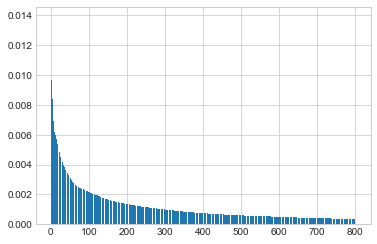

In [28]:
plt.bar(range(1,801),explained_variance)

In [29]:
'''We get a graphical representation of which and how many features are important. We will take 
    n_features =400 by analysing this graph '''

'We get a graphical representation of which and how many features are important. We will take \n    n_features =400 by analysing this graph '

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=400)
Xpca=pca.fit_transform(X[0:340462])
explained_variance=pca.explained_variance_ratio_

<Container object of 400 artists>

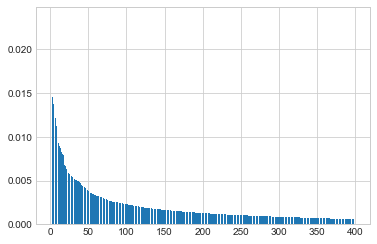

In [30]:
plt.bar(range(1,401),explained_variance)

In [32]:
len(corpus)

340462

In [31]:


                                     #K-Means CLUSTERING



In [32]:
'''We will be using K-Means algorithm to cluster this NLP assignment.
   K-Means clustering is a method of vector quantization, that is popular for cluster analysis in data mining.
   k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster 
   with the nearest mean, serving as a prototype of the cluster.'''

'We will be using K-Means algorithm to cluster this NLP assignment.\n   K-Means clustering is a method of vector quantization, that is popular for cluster analysis in data mining.\n   k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster \n   with the nearest mean, serving as a prototype of the cluster.'

In [33]:
#importing K-Means libraries
from sklearn.cluster import KMeans

In [34]:


'''                         FINDING OUT THE OPTIMUM No. OF CLUSTERS USING ELBOW METHOD                           '''



'                         FINDING OUT THE OPTIMUM No. OF CLUSTERS USING ELBOW METHOD                           '

In [35]:
'''Elbow Method-One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run
    k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each 
    value of k calculate the sum of squared errors (SSE). 
    Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm
    is the value of k that is the best'''

'Elbow Method-One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run\n    k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each \n    value of k calculate the sum of squared errors (SSE). \n    Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm\n    is the value of k that is the best'

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
scores=[]
for i in range(2,21):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    y_means=kmeans.fit_predict(Xpca[0:10000])
    sc_score=silhouette_score(Xpca[0:10000],y_means)
    scores.append(sc_score)

<Container object of 19 artists>

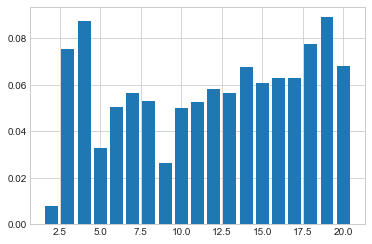

In [38]:
plt.bar(range(2,21),scores)

In [ ]:
'''We take the no. of clusters where silhouette coefficient is the largest'''

In [ ]:
#ELBOW METHOD
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=5,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,6),wcss)
plt.show()

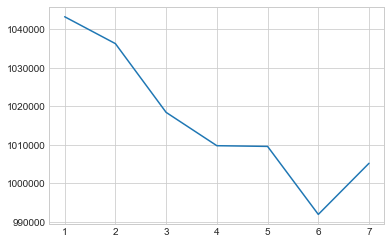

In [53]:
#ELBOW METHOD
wcss=[]
for i in range (1,8):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=7,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,8),wcss)
plt.show()

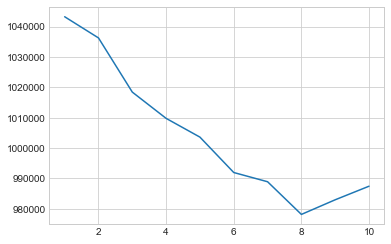

In [54]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

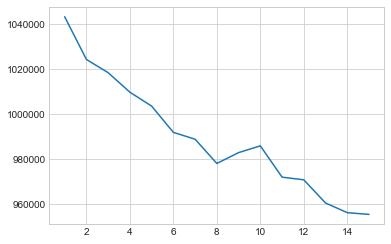

In [71]:
wcss=[]
for i in range (1,16):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=15,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,16),wcss)
plt.show()                                                             #1hour

In [56]:
'''From the above Elbow Method we get the no. of clusters as 8. Taking the no. of clusters as 8 we apply K-Means 
    and visualise the results'''

'From the above Elbow Method we get the no. of clusters as 8. Taking the no. of clusters as 8 we apply K-Means \n    and visualise the results'

In [ ]:


'''                                     TOPIC MODELLING                                                               '''



In [ ]:
'''In machine learning and natural language processing, a topic model is a type of statistical model for discovering the 
abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for 
discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, 
one would expect particular words to appear in the document more or less frequently'''

In [15]:
doc_complete=[]
for i in range(0,len(data)):
    doc_complete.append(data['lines'][i])

In [16]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

In [18]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

C:\Users\sesa472200\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [20]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [22]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, '0.013*"new" + 0.013*"apple" + 0.011*"galaxy"'), (1, '0.020*"ebola" + 0.007*"video" + 0.007*"new"'), (2, '0.019*"u" + 0.007*"stock" + 0.007*"health"')]


In [23]:
''' As you can see the topics like -APPLE ,GALAXY,EBOLA,VIDEO,STOCK and HEALTH are some different topics that are 
being discussed in the context'''

' As you can see the topics like -APPLE ,GALAXY,EBOLA,VIDEO,STOCK and HEALTH are some different topics that are \nbeing discussed in the context'

In [21]:


                                   #K-MEANS CLUSTERING
'''K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data 
(i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the 
number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K 
groups based on the features that are provided. Data points are clustered based on feature similarity. It is simple to use 
and gives a better working on NLP data than other techniques'''


'K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data \n(i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the \nnumber of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K \ngroups based on the features that are provided. Data points are clustered based on feature similarity. It is simple to use \nand gives a better working on NLP data than other techniques'

In [58]:
#Applying K means Clustering
kmeans=KMeans(n_clusters=8,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(x) 

In [59]:
#Calculating the no. of points in each cluster
a1=a2=a3=a4=a5=a6=a7=a8=0
for i in range(0,len(y_means)):
    if y_means[i]==0:
        a1=a1+1
    if y_means[i]==1:
        a2=a2+1
    if y_means[i]==2:
        a3=a3+1
    if y_means[i]==3:
        a4=a4+1
    if y_means[i]==4:
        a5=a5+1
    if y_means[i]==5:
        a6=a6+1
    if y_means[i]==6:
        a7=a7+1
    if y_means[i]==7:
        a8=a8+1
    

<Container object of 8 artists>

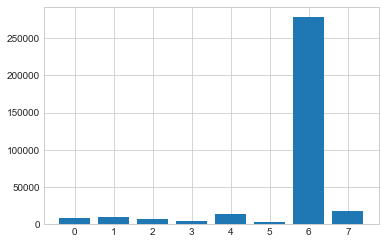

In [77]:
#Making a graph to visualising the no. of points in each cluster
a=[a1,a2,a3,a4,a5,a6,a7,a8]
plt.bar(range(0,8),a)

In [92]:
y_means=pd.DataFrame(y_means)

In [104]:
#Creating the final Output dataframe.
result = pd.concat([view,y_means], axis=1)
result.columns=['lines','Cluster']

In [108]:
result

,lines,Cluster
0,Fed's Charles Plosser sees high bar for change...,6
1,US open: Stocks fall after Fed official hints ...,4
2,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,6
3,Plosser: Fed May Have to Accelerate Tapering Pace,6
4,Fed's Plosser: Taper pace may be too slow,6
5,Fed's Plosser expects US unemployment to fall ...,4
6,US jobs growth last month hit by weather:Fed P...,4
7,ECB unlikely to end sterilisation of SMP purch...,6
8,ECB unlikely to end sterilization of SMP purch...,6
9,EU's half-baked bank union could work,6


In [110]:
result.to_csv('assignment.csv', sep=',')